**Creating and Backtesting SMA Strategies**

Getting the data


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("eurusd.csv", parse_dates=['Date'], index_col='Date')

In [49]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


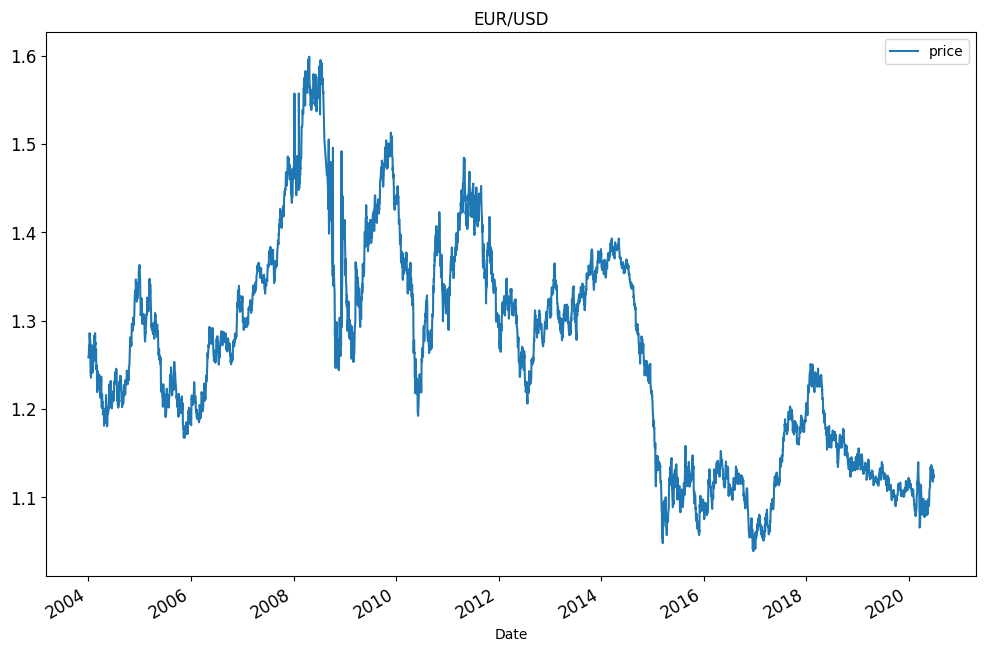

In [51]:
df.plot(figsize=(12,8), title='EUR/USD', fontsize=12)
plt.show()

In [52]:
df['returns'] = np.log(df.div(df.shift(1)))

In [53]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


**A simple Buy and Hold Strategy**

In [54]:
df.dropna(inplace=True)
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


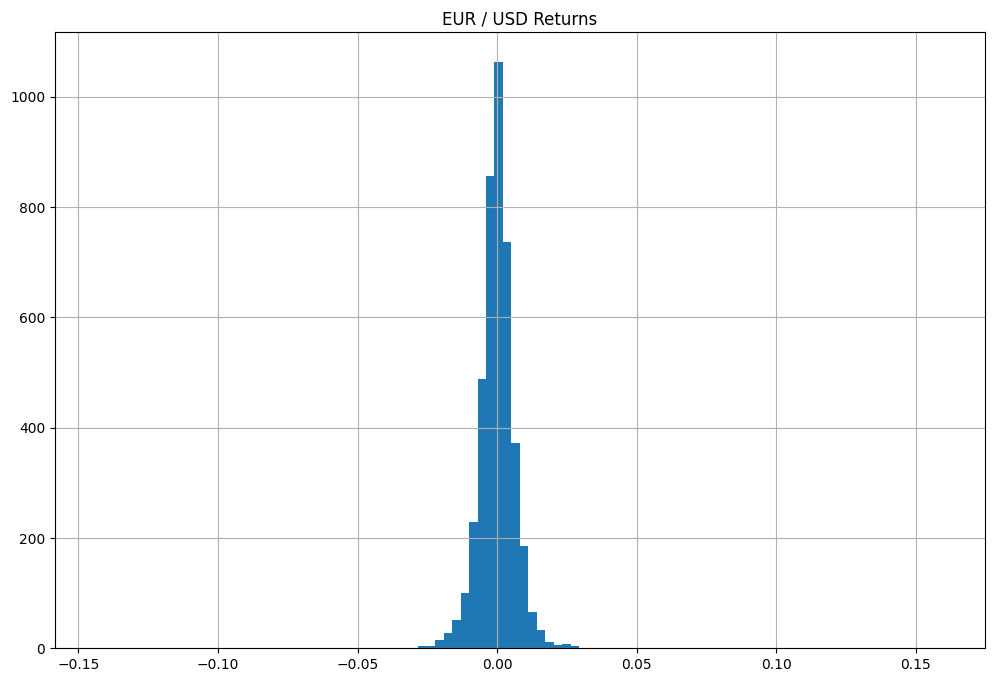

In [55]:
df.returns.hist(bins=100, figsize=(12,8))
plt.title('EUR / USD Returns')
plt.show()

In [56]:
df.returns.sum()

np.float64(-0.11214302770699758)

In [57]:
np.exp(df.returns.sum())

np.float64(0.8939163935445148)

In [58]:
df.price[-1] / df.price[0]

C:\Users\Mohit\AppData\Local\Temp\ipykernel_25348\1327233477.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.price[-1] / df.price[0]


np.float64(0.8939163935445141)

In [59]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [60]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


In [61]:
df['creturns'] = df.returns.cumsum().apply(np.exp)

In [62]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


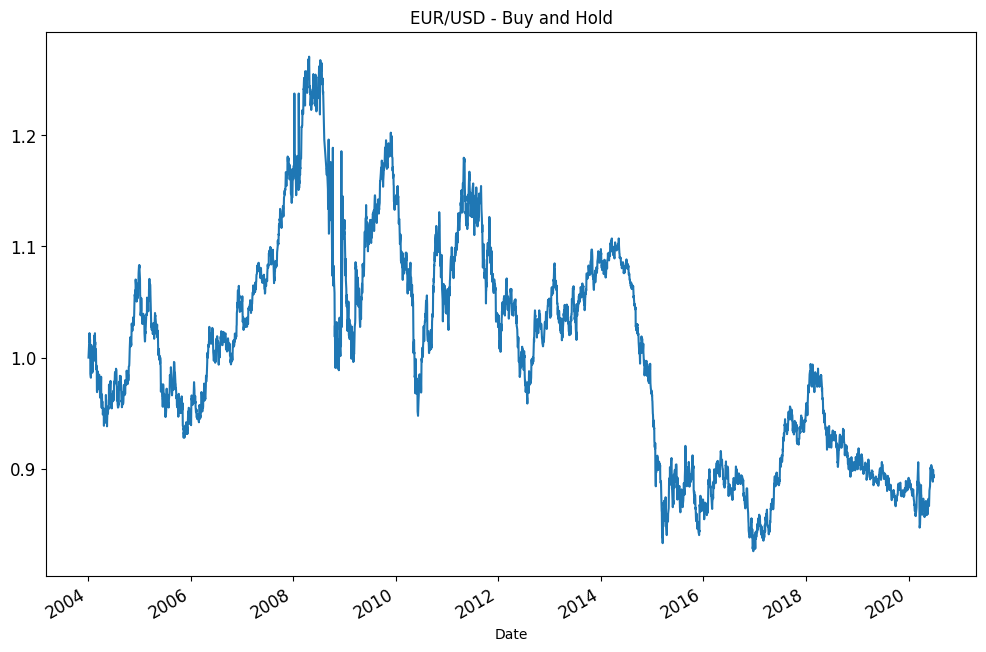

In [63]:
df.creturns.plot(figsize=(12,8), title='EUR/USD - Buy and Hold', fontsize=12)
plt.show()

**More Performance Metrics**

In [64]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [65]:
df.creturns.iloc[-1] #Absolute Performance

np.float64(0.8939163935445149)

In [66]:
df.returns.sum() #Absoulte Performance

np.float64(-0.11214302770699758)

In [67]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


**Annualized mean return and risk**

In [68]:
df.returns.mean() * 252 #Mean Return

np.float64(-0.006612083056191715)

In [69]:
df.returns.std() * np.sqrt(252) #Risk

np.float64(0.12054120479431406)

**Maximum drawdown**

In [70]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [71]:
df['cummax'] = df.creturns.cummax()

In [72]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


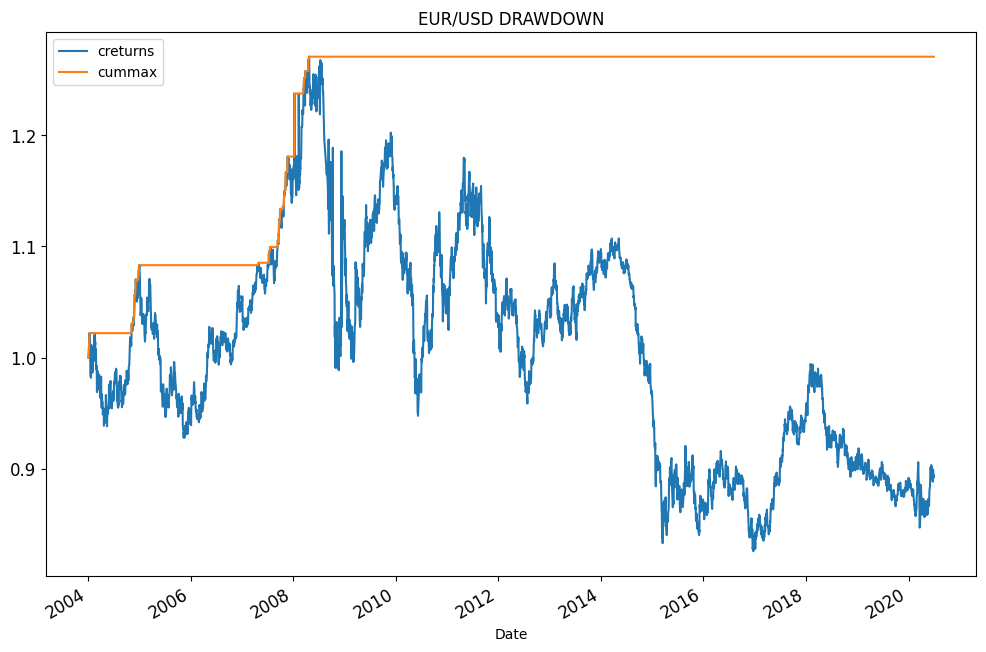

In [73]:
df[['creturns','cummax']].dropna().plot(figsize=(12,8), title='EUR/USD DRAWDOWN', fontsize=12)
plt.show()

In [74]:
drawdown = df['cummax'] - df['creturns']
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [75]:
drawdown.max() #Maximum drawdown

np.float64(0.4448840569933439)

In [76]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

**Defining an SMA Crossover Strategy**

In [77]:
data = pd.read_csv('eurusd.csv', parse_dates=['Date'], index_col='Date')
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [128]:
sma_s = 46
sma_l = 137

In [129]:
data.price.rolling(50)

Rolling [window=50,center=False,axis=0,method=single]

In [130]:
data['SMA_S'] = data.price.rolling(sma_s).mean()
data['SMA_L'] = data.price.rolling(sma_l).mean()

In [131]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-06,1.228094,NaN,NaN,-1,-0.002853,0.002853,0.997151,1.002857
2004-10-07,1.229906,NaN,NaN,-1,0.001475,-0.001475,0.998623,1.001379
2004-10-08,1.241003,NaN,NaN,-1,0.008982,-0.008982,1.007632,0.992426
2004-10-11,1.238405,NaN,NaN,-1,-0.002095,0.002095,1.005523,0.994507
2004-10-12,1.232104,NaN,NaN,-1,-0.005102,0.005102,1.000407,0.999594
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,-1,0.002892,-0.002892,0.918506,1.274904
2020-06-25,1.125087,1.103905,1.102737,-1,-0.005449,0.005449,0.913515,1.281870
2020-06-26,1.122208,1.104801,1.102788,-1,-0.002562,0.002562,0.911177,1.285159


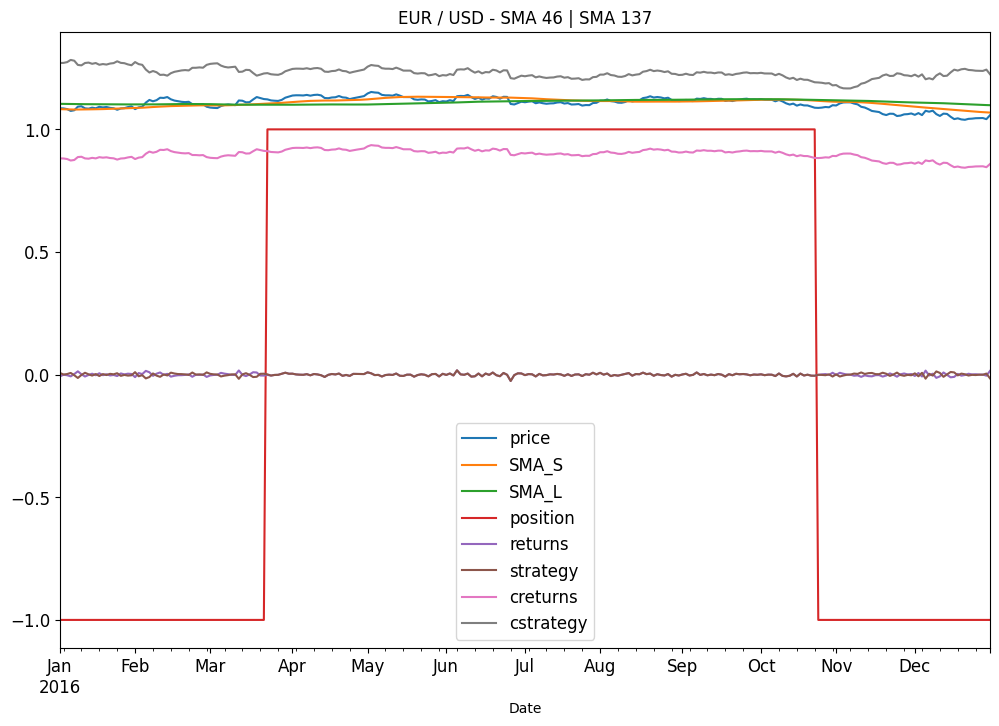

In [132]:
data.loc['2016'].plot(figsize=(12,8), title='EUR / USD - SMA {} | SMA {}'.format(sma_s,sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [133]:
data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-06,1.228094,NaN,NaN,-1,-0.002853,0.002853,0.997151,1.002857
2004-10-07,1.229906,NaN,NaN,-1,0.001475,-0.001475,0.998623,1.001379
2004-10-08,1.241003,NaN,NaN,-1,0.008982,-0.008982,1.007632,0.992426
2004-10-11,1.238405,NaN,NaN,-1,-0.002095,0.002095,1.005523,0.994507
2004-10-12,1.232104,NaN,NaN,-1,-0.005102,0.005102,1.000407,0.999594
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.918506,1.274904
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,0.005449,0.913515,1.281870
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,0.002562,0.911177,1.285159


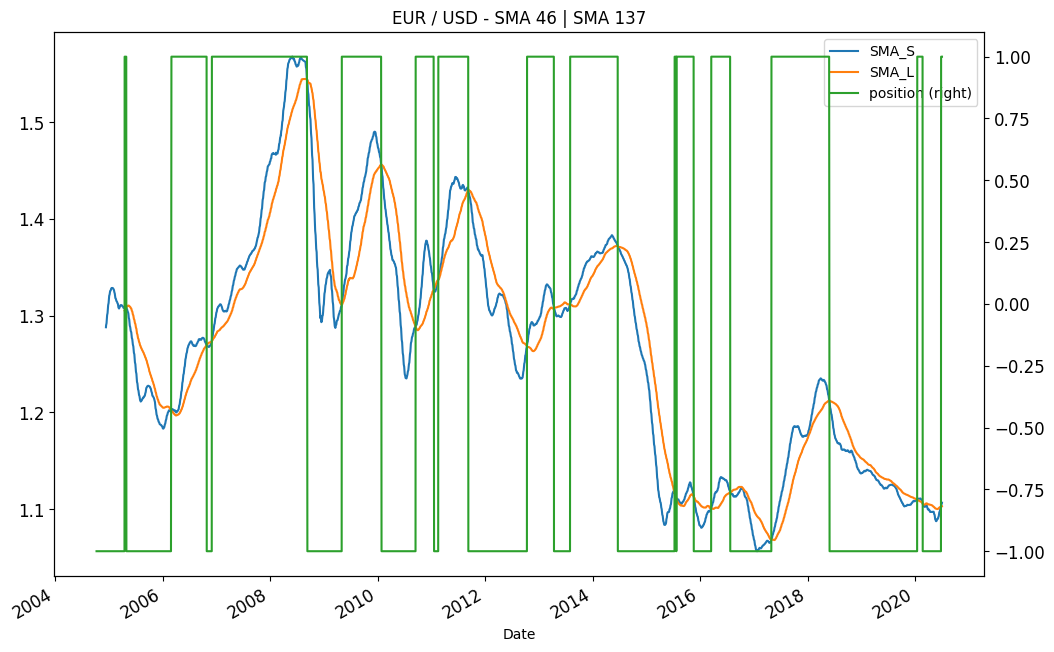

In [134]:
data.loc[:, ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR / USD - SMA {} | SMA {}'.format(sma_s,sma_l))
plt.show()

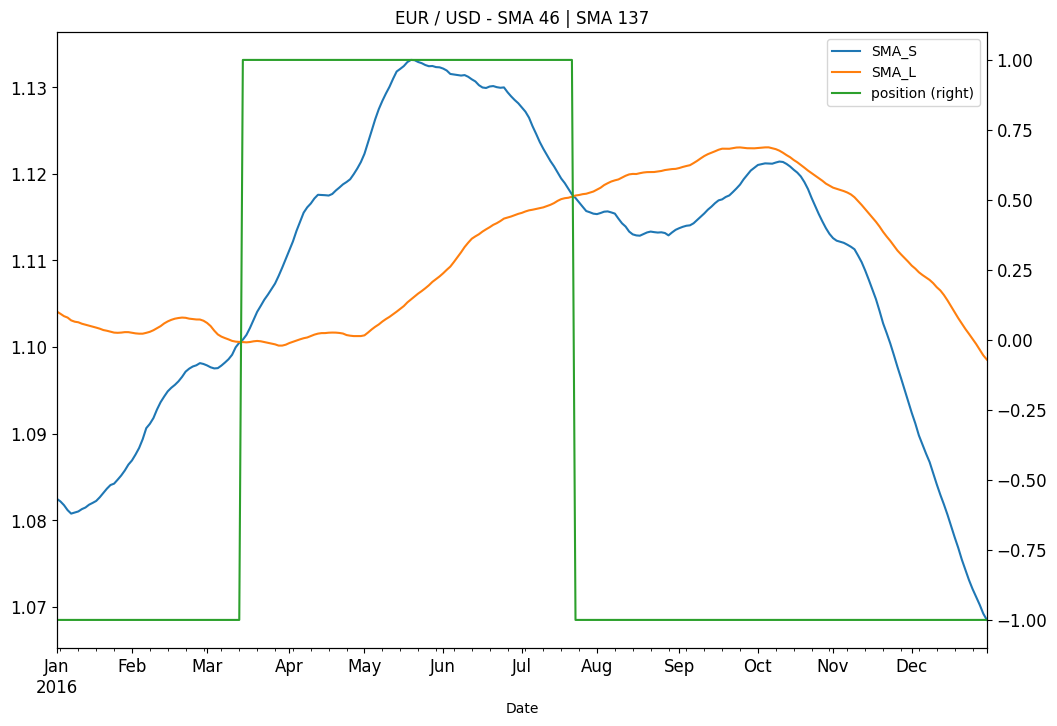

In [135]:
data.loc['2016', ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR / USD - SMA {} | SMA {}'.format(sma_s,sma_l))
plt.show()

**Vectorized Strategy Backtesting**

In [136]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-06,1.228094,NaN,NaN,-1,-0.002853,0.002853,0.997151,1.002857
2004-10-07,1.229906,NaN,NaN,-1,0.001475,-0.001475,0.998623,1.001379
2004-10-08,1.241003,NaN,NaN,-1,0.008982,-0.008982,1.007632,0.992426
2004-10-11,1.238405,NaN,NaN,-1,-0.002095,0.002095,1.005523,0.994507
2004-10-12,1.232104,NaN,NaN,-1,-0.005102,0.005102,1.000407,0.999594
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.918506,1.274904
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,0.005449,0.913515,1.281870
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,0.002562,0.911177,1.285159


In [137]:
data['returns'] = np.log(data.price.div(data.price.shift(1)))
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-06,1.228094,NaN,NaN,-1,NaN,0.002853,0.997151,1.002857
2004-10-07,1.229906,NaN,NaN,-1,0.001475,-0.001475,0.998623,1.001379
2004-10-08,1.241003,NaN,NaN,-1,0.008982,-0.008982,1.007632,0.992426
2004-10-11,1.238405,NaN,NaN,-1,-0.002095,0.002095,1.005523,0.994507
2004-10-12,1.232104,NaN,NaN,-1,-0.005102,0.005102,1.000407,0.999594
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.918506,1.274904
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,0.005449,0.913515,1.281870
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,0.002562,0.911177,1.285159


In [138]:
data['strategy'] = data.position.shift(1) * data['returns']
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-06,1.228094,NaN,NaN,-1,NaN,NaN,0.997151,1.002857
2004-10-07,1.229906,NaN,NaN,-1,0.001475,-0.001475,0.998623,1.001379
2004-10-08,1.241003,NaN,NaN,-1,0.008982,-0.008982,1.007632,0.992426
2004-10-11,1.238405,NaN,NaN,-1,-0.002095,0.002095,1.005523,0.994507
2004-10-12,1.232104,NaN,NaN,-1,-0.005102,0.005102,1.000407,0.999594
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.918506,1.274904
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.913515,1.281870
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.911177,1.285159


In [139]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-06,1.228094,NaN,NaN,-1,NaN,NaN,0.997151,1.002857
2004-10-07,1.229906,NaN,NaN,-1,0.001475,-0.001475,0.998623,1.001379
2004-10-08,1.241003,NaN,NaN,-1,0.008982,-0.008982,1.007632,0.992426
2004-10-11,1.238405,NaN,NaN,-1,-0.002095,0.002095,1.005523,0.994507
2004-10-12,1.232104,NaN,NaN,-1,-0.005102,0.005102,1.000407,0.999594
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.918506,1.274904
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.913515,1.281870
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.911177,1.285159


In [140]:
data.dropna(inplace=True)

In [141]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2005-04-15,1.287001,1.308835,1.305143,1,0.005852,-0.005852,1.044981,1.017874
2005-04-18,1.301795,1.309185,1.305681,1,0.011429,0.011429,1.056993,1.029575
2005-04-19,1.306506,1.309385,1.306240,1,0.003613,0.003613,1.060818,1.033301
2005-04-20,1.308695,1.309537,1.306734,1,0.001674,0.001674,1.062595,1.035032
2005-04-21,1.304700,1.309589,1.307218,1,-0.003058,-0.003058,1.059351,1.031872
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.918506,1.274904
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.913515,1.281870
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.911177,1.285159


In [142]:
data[['returns','strategy']].sum() #Absoulte performance

returns    -0.128929
strategy    0.875697
dtype: float64

In [143]:
data[['returns','strategy']].sum().apply(np.exp) #Absoulte performance

returns     0.879036
strategy    2.400547
dtype: float64

In [144]:
data[['returns','strategy']].mean() * 252 #Annualized return

returns    -0.008246
strategy    0.056009
dtype: float64

In [145]:
data[['returns','strategy']].std() * np.sqrt(252) #Annualized risk

returns     0.12181
strategy    0.12176
dtype: float64

In [146]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

In [147]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2005-04-15,1.287001,1.308835,1.305143,1,0.005852,-0.005852,1.005869,0.994166
2005-04-18,1.301795,1.309185,1.305681,1,0.011429,0.011429,1.017431,1.005593
2005-04-19,1.306506,1.309385,1.306240,1,0.003613,0.003613,1.021113,1.009233
2005-04-20,1.308695,1.309537,1.306734,1,0.001674,0.001674,1.022824,1.010923
2005-04-21,1.304700,1.309589,1.307218,1,-0.003058,-0.003058,1.019701,1.007837
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.884128,2.414451
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.879323,2.401331
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.877073,2.395186


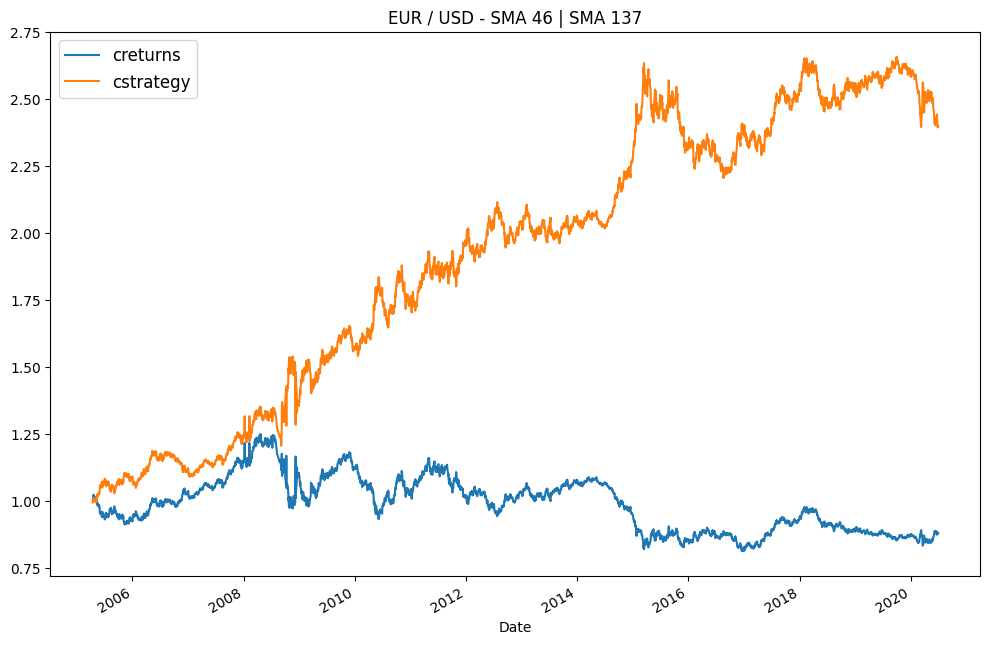

In [148]:
data[['creturns','cstrategy']].plot(figsize = (12,8), title='EUR / USD - SMA {} | SMA {}'.format(sma_s,sma_l))
plt.legend(fontsize=12)
plt.show()

In [150]:
outperf = data.cstrategy.iloc[-1] - data.creturns[-1]
outperf

C:\Users\Mohit\AppData\Local\Temp\ipykernel_25348\4094362727.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outperf = data.cstrategy.iloc[-1] - data.creturns[-1]


np.float64(1.521510939675115)

**Finding Optimal SMA Strategy**

In [106]:
df = pd.read_csv('eurusd.csv', parse_dates=['Date'], index_col='Date')

In [107]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [108]:
def test_strategy(SMA):
    data = df.copy()
    data['returns'] = np.log(data.price.div(data.price.shift(1)))
    data['sma_s'] = data.price.rolling(int(SMA[0])).mean()
    data['sma_l'] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)

    data['position'] = np.where(data['sma_s'] > data['sma_l'],1,-1)
    data['strategy'] = data.position.shift(1) * data['returns']
    data.dropna(inplace=True)

    return np.exp(data['strategy'].sum())

In [109]:
test_strategy((50,200))

np.float64(1.2835003323288487)

In [110]:
test_strategy((70,200))

np.float64(1.2612278829831105)

In [111]:
sma_s_range = range(10,50,1)
sma_l_range = range(100,252,1)

In [112]:
sma_s_range

range(10, 50)

In [113]:
from itertools import product

In [114]:
list(product(sma_s_range, sma_l_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [115]:
combinations = list(product(sma_s_range, sma_l_range))

In [116]:
len(combinations)

6080

In [117]:
(50-10) * (252-100)

6080

In [118]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [119]:
results

[np.float64(0.919639848594834),
 np.float64(0.9017909001165385),
 np.float64(0.9088514707606253),
 np.float64(0.9172039081156574),
 np.float64(0.9902316124249487),
 np.float64(0.9839526868794093),
 np.float64(1.0304555530676556),
 np.float64(1.0580627844394732),
 np.float64(1.0209474697557395),
 np.float64(1.1225414594776157),
 np.float64(1.1439396770251977),
 np.float64(1.0928826062479924),
 np.float64(1.158686928858328),
 np.float64(1.1472509415077028),
 np.float64(1.0535678507360313),
 np.float64(1.0834788006764182),
 np.float64(1.151663935854727),
 np.float64(1.1505573494996577),
 np.float64(1.1653183679562213),
 np.float64(1.2167014670211942),
 np.float64(1.2416587315963905),
 np.float64(1.1667630873747963),
 np.float64(1.2185865782849303),
 np.float64(1.1718965787619908),
 np.float64(1.1816366630339725),
 np.float64(1.13721357858156),
 np.float64(1.1858141820530623),
 np.float64(1.266796025009642),
 np.float64(1.2954797436418617),
 np.float64(1.2487089215312812),
 np.float64(1.27

In [120]:
np.argmax(results)

np.int64(5509)

In [121]:
combinations[np.argmax(results)]

(46, 137)

In [122]:
many_results = pd.DataFrame(data = combinations, columns=['sms_s','sma_l'])
many_results

,sms_s,sma_l
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [124]:
many_results['performance'] = results

In [125]:
many_results.nlargest(10,'performance')

,sms_s,sma_l,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


In [127]:
many_results.nsmallest(10,'performance')

,sms_s,sma_l,performance
461,13,105,0.835621
310,12,106,0.837311
309,12,105,0.846303
159,11,107,0.849825
307,12,103,0.851647
308,12,104,0.852194
608,14,100,0.865872
306,12,102,0.871889
462,13,106,0.876600
458,13,102,0.876784


**Generalization with OOP: The SMABacktester Class**

In [155]:
df = pd.read_csv('forex_pairs.csv', parse_dates=['Date'], index_col='Date')
df

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


In [157]:
import SMABacktester as SMA

In [158]:
tester = SMA.SMABacktester('EURUSD=X', 50, 200, '2004-01-01','2020-06-30')

In [160]:
tester.test_strategy()

(np.float64(1.2835), np.float64(0.367674))

In [161]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497


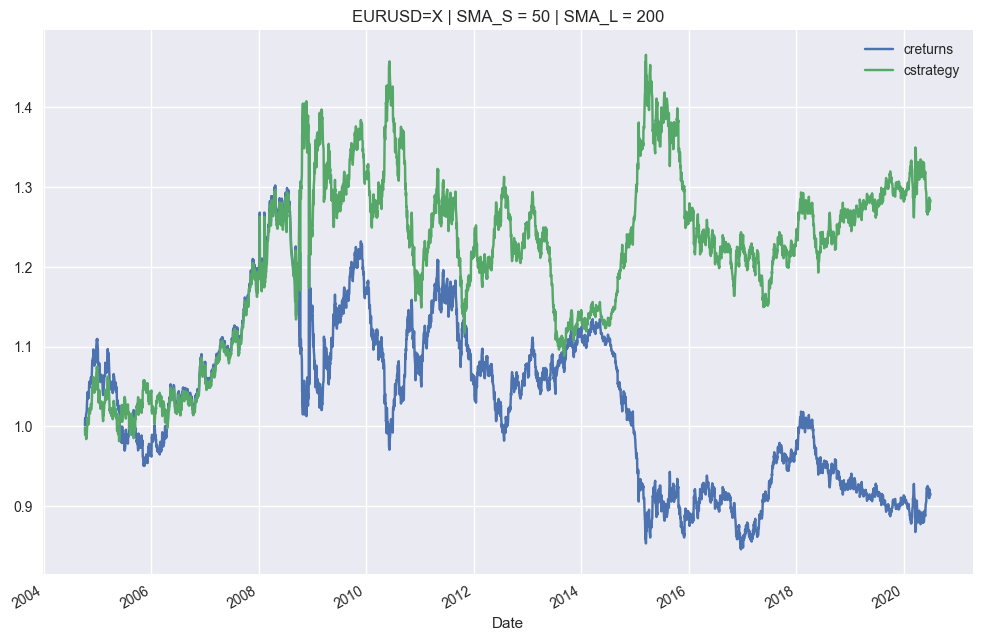

In [162]:
tester.plot_results()

In [163]:
tester.set_parameters(75, 150)

In [164]:
tester.test_strategy()

(np.float64(1.58974), np.float64(0.655896))

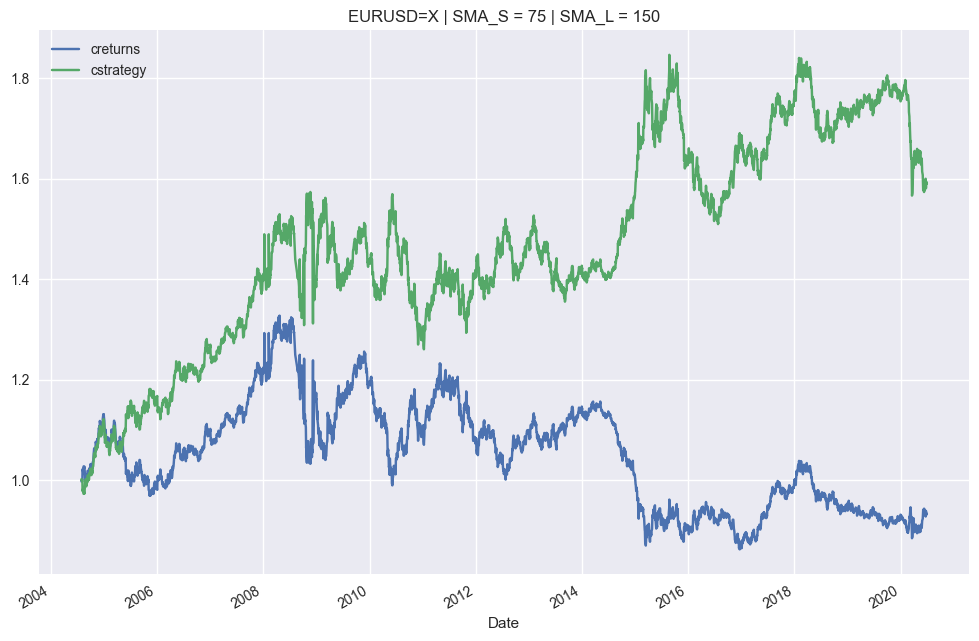

In [165]:
tester.plot_results()

In [166]:
tester.optimize_parameters((25,50,1),(100,200,1))

((46, 137), np.float64(2.526694))

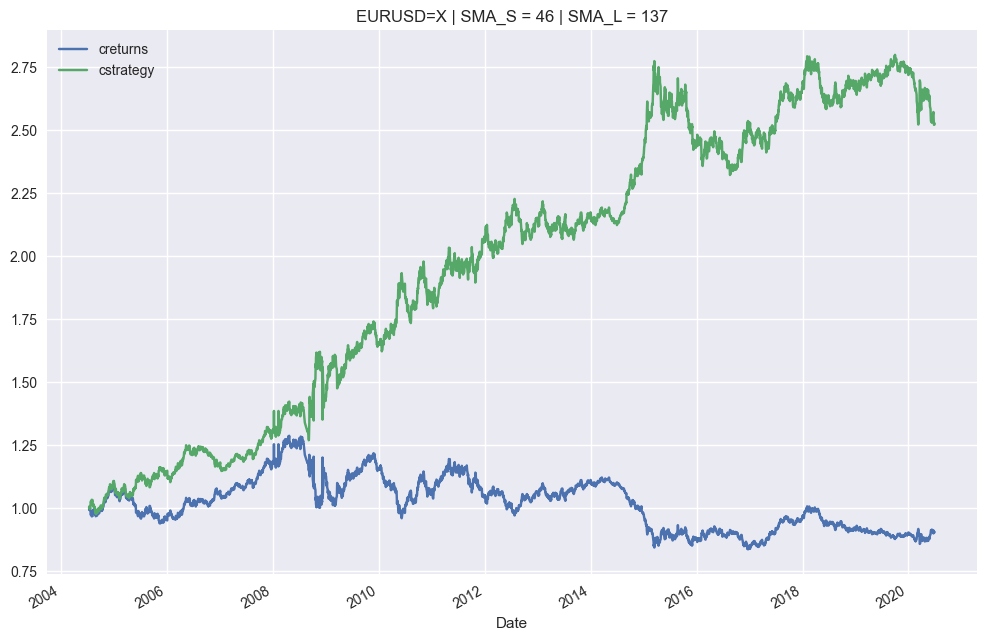

In [167]:
tester.plot_results()

In [168]:
tester.results_overview

,SMA_S,SMA_L,performance
0,25,100,1.236187
1,25,101,1.261659
2,25,102,1.217403
3,25,103,1.305591
4,25,104,1.345555
...,...,...,...
2495,49,195,1.317730
2496,49,196,1.279151
2497,49,197,1.238046
2498,49,198,1.213654


**Backtesting & Forward Testing**

In [170]:
train = SMA.SMABacktester('EURUSD=X', 50, 200, '2004-01-01','2015-12-31')

In [171]:
train.optimize_parameters((25,50,1),(100,200,1))

((46, 137), np.float64(2.440535))

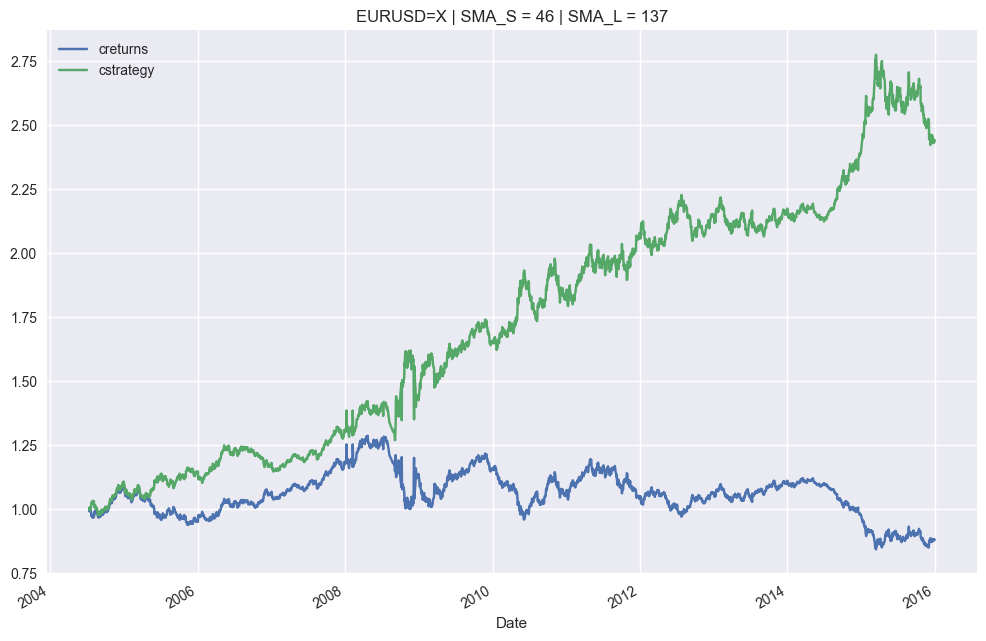

In [172]:
train.plot_results()

In [173]:
tester = SMA.SMABacktester('EURUSD=X', 46, 137, '2016-01-01','2020-06-30')

In [174]:
tester.test_strategy()

(np.float64(1.056731), np.float64(0.038331))

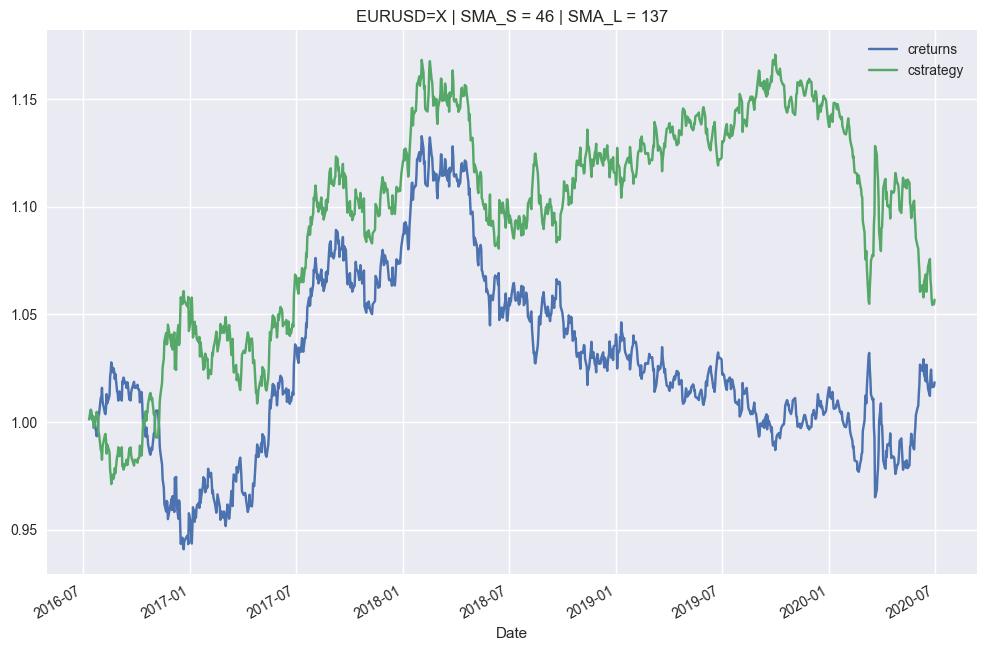

In [175]:
tester.plot_results()

**AUD / EUR**

In [176]:
tester = SMA.SMABacktester('AUDEUR=X', 50, 200, '2004-01-01', '2020-06-30')

In [177]:
tester.test_strategy()

(np.float64(1.145599), np.float64(0.106464))

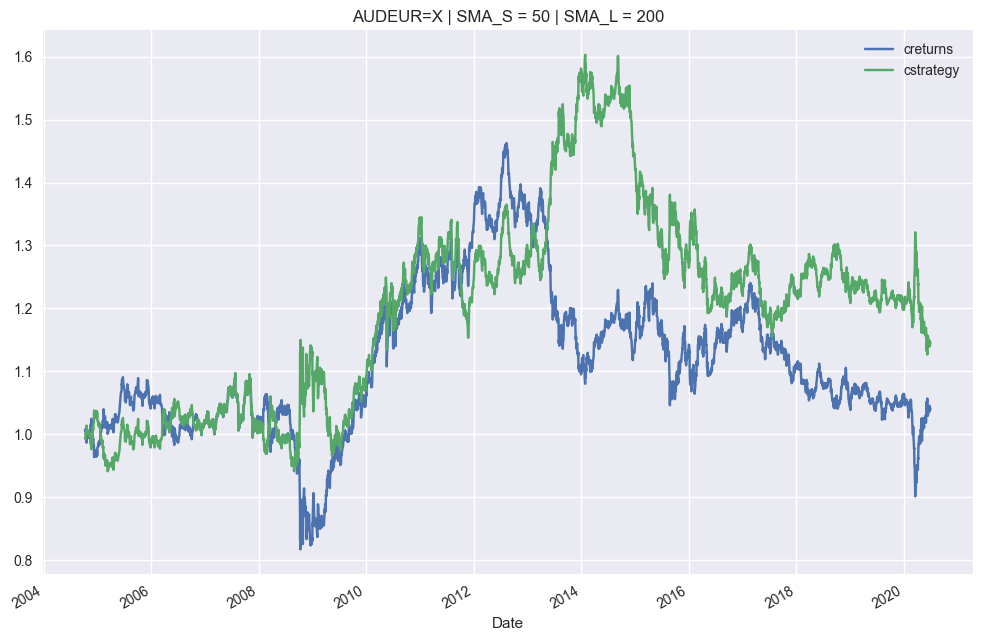

In [179]:
tester.plot_results()

In [180]:
tester.optimize_parameters((25,50,1),(100,200,1))

((33, 197), np.float64(1.457339))

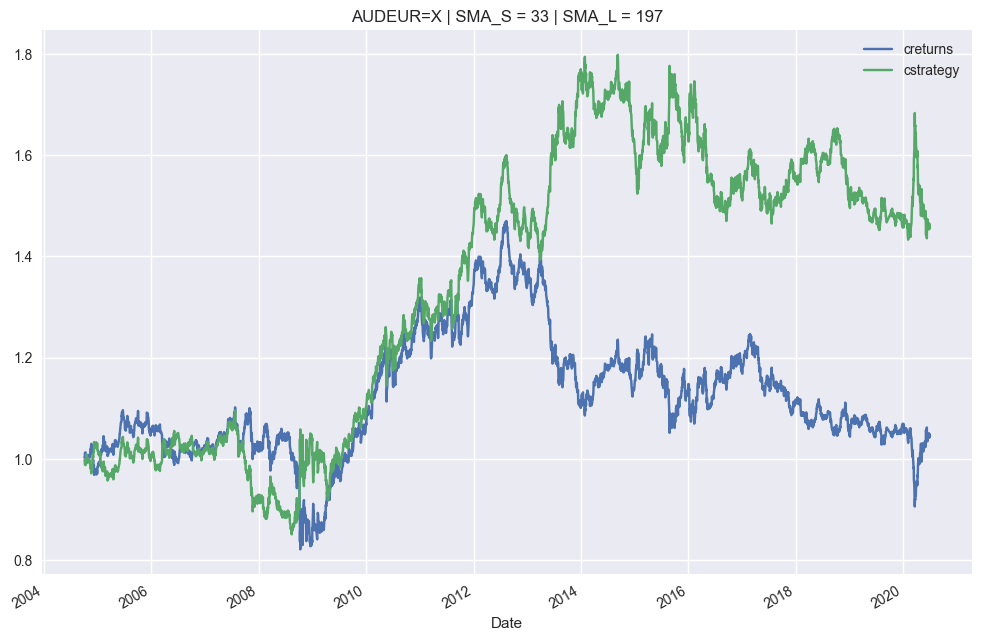

In [181]:
tester.plot_results()